# Stock Market Analysis and Predictions using Machine Learning

In [ ]:
# Import necessary libraries
import os
# Set TensorFlow log level to 3 (ERROR) to suppress less important log messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation and analysis
import matplotlib.pyplot as plt  # Import Matplotlib for data visualization
import tensorflow as tf  # Import TensorFlow for machine learning tasks
import yfinance as yfin  # Import yfinance library for accessing stock market data
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler for scaling data
from keras.layers import Dense, Dropout, LSTM  # Import Keras layers for building neural network
from keras.models import Sequential  # Import Sequential model from Keras for building neural network

In [2]:
# Use yfinance's override function to replace pandas_datareader's data fetching methods with yfinance's methods
yfin.pdr_override()

## Importing the stock market data using the Yahoo Finance API

In [3]:
# Define the start and end dates for the stock data
start, end = '1990-01-01', '2023-03-16'
# Download the stock data for the specified symbol (META) and date range using yfinance's download function
data = yfin.download('META', start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
# Display data
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2023-03-09,186.350006,188.929993,180.300003,181.690002,181.690002,26582800
2023-03-10,181.009995,184.770004,178.800003,179.509995,179.509995,25547400
2023-03-13,177.960007,183.779999,174.820007,180.899994,180.899994,24728000


## Cleaning the Data

In [5]:
# Remove the 'Adj Close' column from the dataset, as it's not needed for this analysis
data = data.drop(['Adj Close'], axis=1)
# Convert the index of the DataFrame to datetime objects for better handling of time series data
data.index = pd.to_datetime(data.index)

In [6]:
# Display data
data

,Open,High,Low,Close,Volume
Date,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200
...,...,...,...,...,...
2023-03-09,186.350006,188.929993,180.300003,181.690002,26582800
2023-03-10,181.009995,184.770004,178.800003,179.509995,25547400
2023-03-13,177.960007,183.779999,174.820007,180.899994,24728000


## Visualize the Raw Data

In [7]:
# Define a function to visualize raw data
def plot_data(data, label, color):
    # Plot the given data with specified color and label using Matplotlib's plot function
    plt.plot(data, color, label=label)

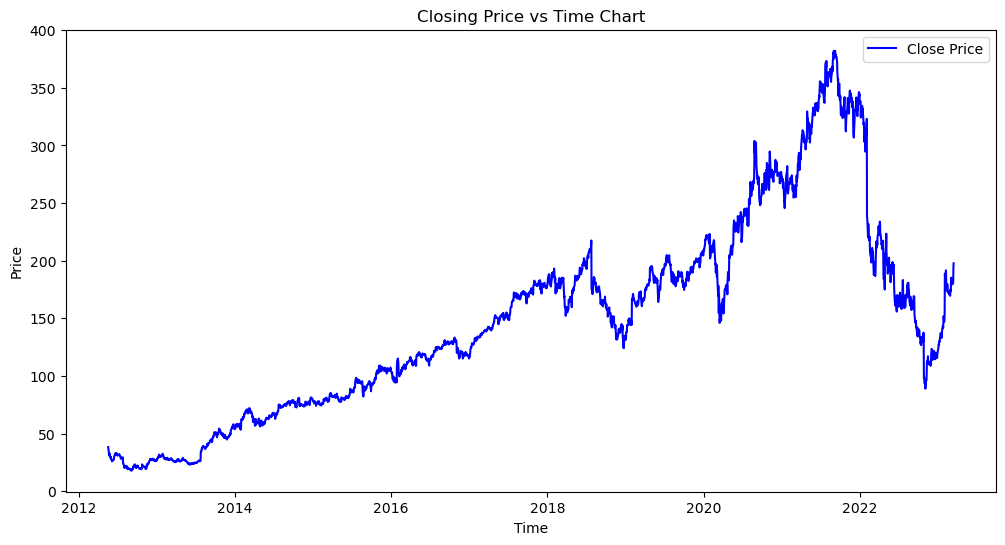

In [8]:
# Create a new Matplotlib figure with specified dimensions
plt.figure(figsize=(12, 6))
# Call the plot_data function to plot the Close Price data with the specified label and color
plot_data(data.Close, 'Close Price', 'b')
# Set the title for the plot
plt.title('Close Price - Raw Data')
# Set the x-axis label for the plot
plt.xlabel('Time')
# Set the y-axis label for the plot
plt.ylabel('Price')
# Add a title to the plot
plt.title('Closing Price vs Time Chart')
# Display the legend for the plot
plt.legend()
# Show the plot
plt.show()

In [9]:
# Define a function to visualize moving averages
def plot_moving_average(window, color):
    # Calculate the moving average with the specified window size using the Close Price data
    ma = data.Close.rolling(window).mean()
    # Plot the moving average with the specified color and label using Matplotlib's plot function
    plt.plot(ma, color, label=f'MA{window}')

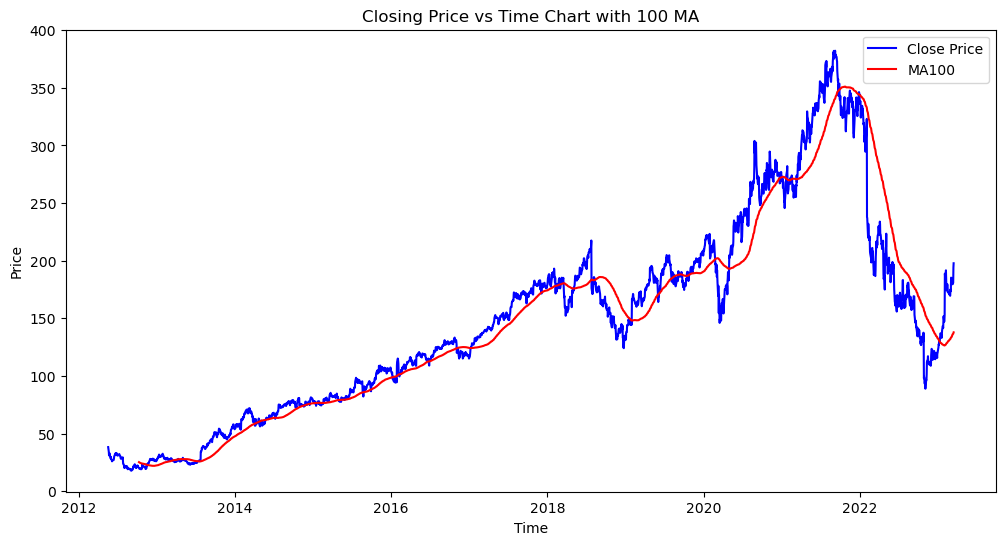

In [10]:
# Create a new Matplotlib figure with specified dimensions
plt.figure(figsize=(12, 6))
# Call the plot_data function to plot the Close Price data with the specified label and color
plot_data(data.Close, 'Close Price', 'b')
# Call the plot_moving_average function to plot the 100-day moving average with the specified color
plot_moving_average(100, 'r')
# Set the x-axis label for the plot
plt.xlabel('Time')
# Set the y-axis label for the plot
plt.ylabel('Price')
# Add a title to the plot
plt.title('Closing Price vs Time Chart with 100 MA')
# Display the legend for the plot
plt.legend()
# Show the plot
plt.show()

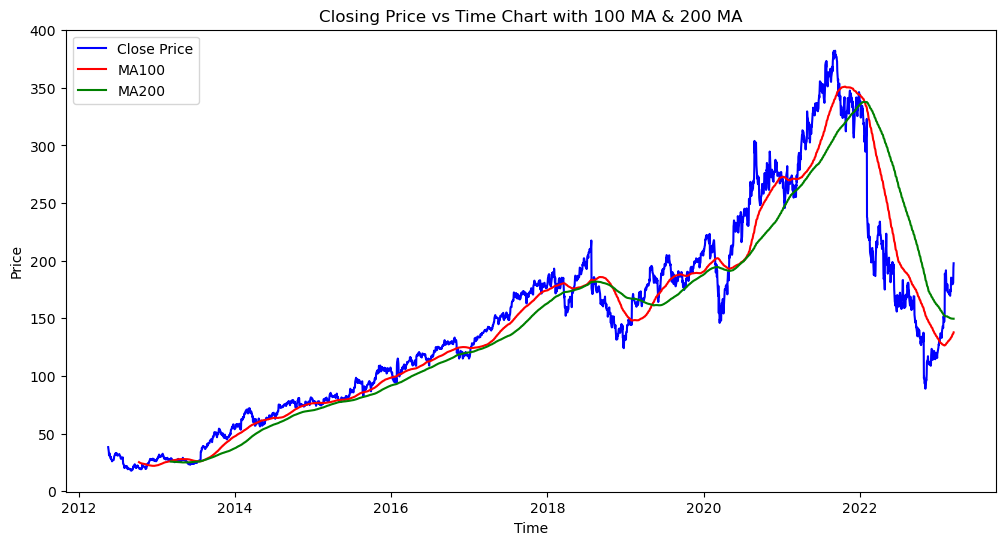

In [11]:
# Create a new Matplotlib figure with specified dimensions
plt.figure(figsize=(12, 6))
# Call the plot_data function to plot the Close Price data with the specified label and color
plot_data(data.Close, 'Close Price', 'b')
# Call the plot_moving_average function to plot the 100-day moving average with the specified color
plot_moving_average(100, 'r')
# Call the plot_moving_average function to plot the 200-day moving average with the specified color
plot_moving_average(200, 'g')
# Set the x-axis label for the plot
plt.xlabel('Time')
# Set the y-axis label for the plot
plt.ylabel('Price')
# Add a title to the plot
plt.title('Closing Price vs Time Chart with 100 MA & 200 MA')
# Display the legend for the plot
plt.legend()
# Show the plot
plt.show()

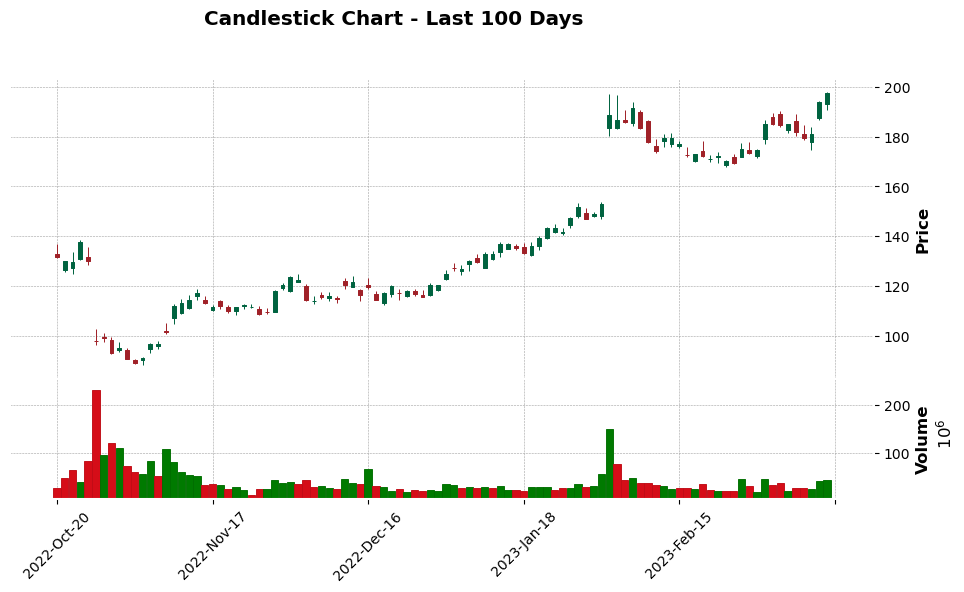

In [12]:
# Import mplfinance library for creating financial charts
import mplfinance as mpf

# Select the last 100 rows of the data and relevant columns for creating a candlestick chart
candle_data = data.iloc[-100:][['Open', 'High', 'Low', 'Close', 'Volume']]
# Plot a candlestick chart using mplfinance's plot function with specified chart type, style, title, labels, and size
mpf.plot(candle_data, type='candle', style='charles', title='Candlestick Chart - Last 100 Days',
         ylabel='Price', volume=True, figsize=(12, 6), ylabel_lower='Volume')

## Developping the Training Model

In [13]:
# Divide the dataset into training and testing sets using a 70-30 split
# Select the 'Close' column for training data, take the first 70% of the data, and convert it to a NumPy array
train_data = data['Close'].iloc[:int(len(data)*0.7)].values
# Select the 'Close' column for testing data, take the remaining 30% of the data, and convert it to a NumPy array
test_data = data['Close'].iloc[int(len(data)*0.7):].values

In [14]:
# Instantiate a MinMaxScaler object to scale the data between 0 and 1
scaler = MinMaxScaler((0, 1))
# Scale the training data using the MinMaxScaler object and reshape it into a 2D array
train_data_scaled = scaler.fit_transform(train_data.reshape(-1, 1))

In [15]:
# Define a function to generate sequences for training the LSTM model
def get_sequences(data, n):
    x, y = [], []  # Initialize empty lists for input (x) and output (y) sequences
    for i in range(n, len(data)):
        # Append a sequence of 'n' data points as input (x) and the next data point as output (y)
        x.append(data[i-n:i])
        y.append(data[i])
    # Convert the lists into NumPy arrays and return them
    return np.array(x), np.array(y)

In [16]:
# Generate input (x_train) and output (y_train) sequences for the LSTM model using the get_sequences function
x_train, y_train = get_sequences(train_data_scaled, 100)

## Using the LSTM (Long Short-Term Memory) Model.

### LSTM model is a type of recurrent neural network (RNN) architecture that can maintain information over time and that makes it well-suited for modeling sequential data for s stock market analysis.

In [17]:
# Define the LSTM model using the Keras Sequential API
model = Sequential([
    # Add an LSTM layer with 200 units, ReLU activation, and input shape of (100, 1)
    LSTM(200, activation='relu', return_sequences=True, input_shape=(100, 1)),
    # Add a Dropout layer with a 0.2 dropout rate to reduce overfitting
    Dropout(0.2),
    # Add another LSTM layer with 60 units and ReLU activation
    LSTM(60, activation='relu', return_sequences=True),
    # Add a Dropout layer with a 0.3 dropout rate
    Dropout(0.3),
    # Add another LSTM layer with 80 units and ReLU activation
    LSTM(80, activation='relu', return_sequences=True),
    # Add a Dropout layer with a 0.4 dropout rate
    Dropout(0.4),
    # Add another LSTM layer with 120 units and ReLU activation
    LSTM(120, activation='relu'),
    # Add a Dropout layer with a 0.5 dropout rate
    Dropout(0.5),
    # Add a Dense output layer with 1 unit (for predicting the stock price)
    Dense(1)
])

In [18]:
# Compile the LSTM model with the Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the LSTM model on the input and output sequences for 100 epochs
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
57/57 [==============================] - 12s 149ms/step - loss: 0.0713
Epoch 2/100
57/57 [==============================] - 10s 170ms/step - loss: 0.0110
Epoch 3/100
57/57 [==============================] - 10s 168ms/step - loss: 0.0091
Epoch 4/100
57/57 [==============================] - 11s 187ms/step - loss: 0.0080
Epoch 5/100
57/57 [==============================] - 10s 174ms/step - loss: 0.0082
Epoch 6/100
57/57 [==============================] - 10s 177ms/step - loss: 0.0078
Epoch 7/100
57/57 [==============================] - 9s 155ms/step - loss: 0.0070
Epoch 8/100
57/57 [==============================] - 9s 157ms/step - loss: 0.0068
Epoch 9/100
57/57 [==============================] - 9s 157ms/step - loss: 0.0073
Epoch 10/100
57/57 [==============================] - 9s 161ms/step - loss: 0.0075
Epoch 11/100
57/57 [==============================] - 10s 169ms/step - loss: 0.0059
Epoch 12/100
57/57 [==============================] - 11s 198ms/step - loss: 0.0059
Epoch

In [19]:
# Save the trained LSTM model to a file named 'model.h5'
model.save('model.h5')

In [20]:
# Concatenate the last 100 data points of the training set with the test set
final_data = np.concatenate((data['Close'].iloc[-100:].values, test_data))
# Scale the concatenated data using the MinMaxScaler object and reshape it into a 2D array
input_data = scaler.fit_transform(final_data.reshape(-1, 1))
# Generate input (x_test) and output (y_test) sequences for the LSTM model using the get_sequences function
x_test, y_test = get_sequences(input_data, 100)

## Making Predictions using the developed model

In [21]:
# Make predictions on the test set using the trained LSTM model
y_predicted = model.predict(x_test)
# Calculate the scaling factor to reverse the scaling applied to the test set data
scale_factor = 1/scaler.scale_[0]
# Reverse the scaling of the predicted values using the scaling factor
y_predicted *= scale_factor
# Reverse the scaling of the true output values (y_test) using the scaling factor
y_test *= scale_factor

26/26 [==============================] - 3s 83ms/step


## Actual Stock Closing Orice vs Model Prediction Price

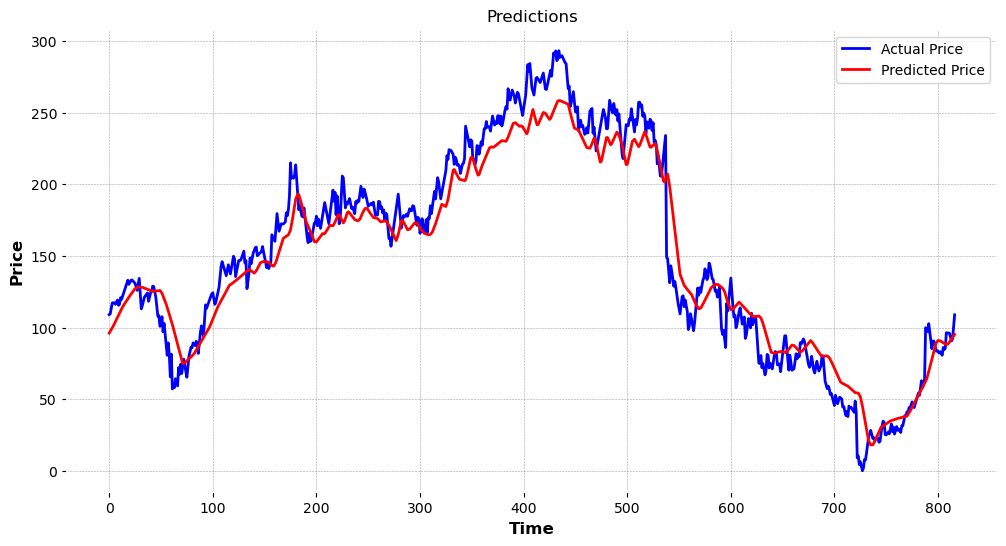

In [22]:
# Create a new Matplotlib figure with specified dimensions
plt.figure(figsize=(12, 6))
# Call the plot_data function to plot the original price data (y_test) with the specified label and color
plot_data(y_test, 'Actual Price', 'b')
# Call the plot_data function to plot the predicted price data (y_predicted) with the specified label and color
plot_data(y_predicted, 'Predicted Price', 'r')
# Add a title to the plot
plt.title('Predictions')
# Set the x-axis label for the plot
plt.xlabel('Time')
# Set the y-axis label for the plot
plt.ylabel('Price')
# Display the legend for the plot
plt.legend()
# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

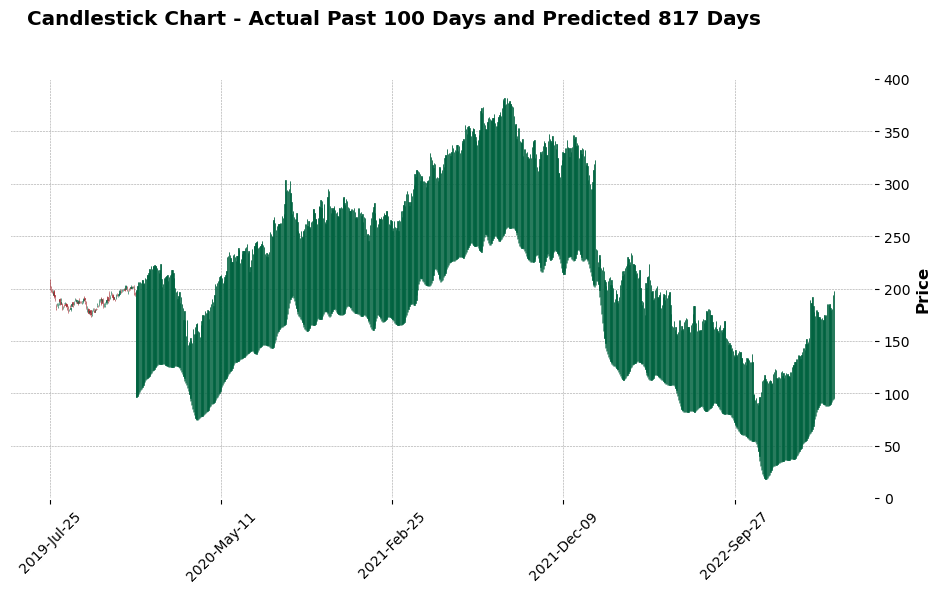

In [26]:
# Create a data_testing DataFrame with the same index as the last 817 days of the original data
data_testing = data.iloc[-817:].copy()

# Create a DataFrame for predicted prices
predicted_prices = pd.DataFrame(y_predicted, index=data_testing.index, columns=['Predicted Close'])

# Combine original and predicted data
combined_data = pd.concat([data, predicted_prices], axis=1)

# Calculate Open, High, Low values for the predicted part
combined_data['Predicted Open'] = combined_data['Predicted Close'].shift(1)
combined_data['Predicted High'] = combined_data[['Predicted Open', 'Predicted Close']].max(axis=1)
combined_data['Predicted Low'] = combined_data[['Predicted Open', 'Predicted Close']].min(axis=1)

# Select the last 917 days (100 days actual + 817 days predicted)
candle_data_actual_predicted = combined_data.iloc[-917:].copy()

# Replace original OHLC values with predicted values in the predicted part
candle_data_actual_predicted.loc[predicted_prices.index, ['Open', 'High', 'Low']] = candle_data_actual_predicted.loc[predicted_prices.index, ['Predicted Open', 'Predicted High', 'Predicted Low']].values

# Fill missing values in the combined dataset
candle_data_actual_predicted.fillna(method='ffill', inplace=True)

# Create a candlestick chart for actual past 100 days and predicted 817 days
plt.figure(figsize=(12, 6))
mpf.plot(candle_data_actual_predicted[['Open', 'High', 'Low', 'Close']], type='candle', style='charles', title='Candlestick Chart - Actual Past 100 Days and Predicted 817 Days',
         ylabel='Price', volume=False, figsize=(12, 6), warn_too_much_data=len(candle_data_actual_predicted) + 1)
plt.show()